# Implementing Particle Swarm Optimization For Mock Assessment Solution

In [4]:
from torch.cuda import graph
# Installing the necessary requirements
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install networkx

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import networkx as nx
from networkx.classes import neighbors

In [7]:
colnames = ['Node', 'Position1', 'Position2']
position_data = pd.read_csv('sub_data_file.csv', header=None, names=colnames, index_col=['Node']) # Reading and assigning the nodes as index, to remove redundancy
# Adding the last two base stations to the dataset just incase it's not present in the csv.
position_data.loc[151] = [5000, -5000]
position_data.loc[152] = [-5000, 5000]
position_data.head()

,Position1,Position2
Node,,
1,4873.6,4886.7
2,-3295.7,-4330.5
3,-2407.1,4397.4
4,-1027.0,-4828.9
5,-4260.1,1838.4


## Plotting The points

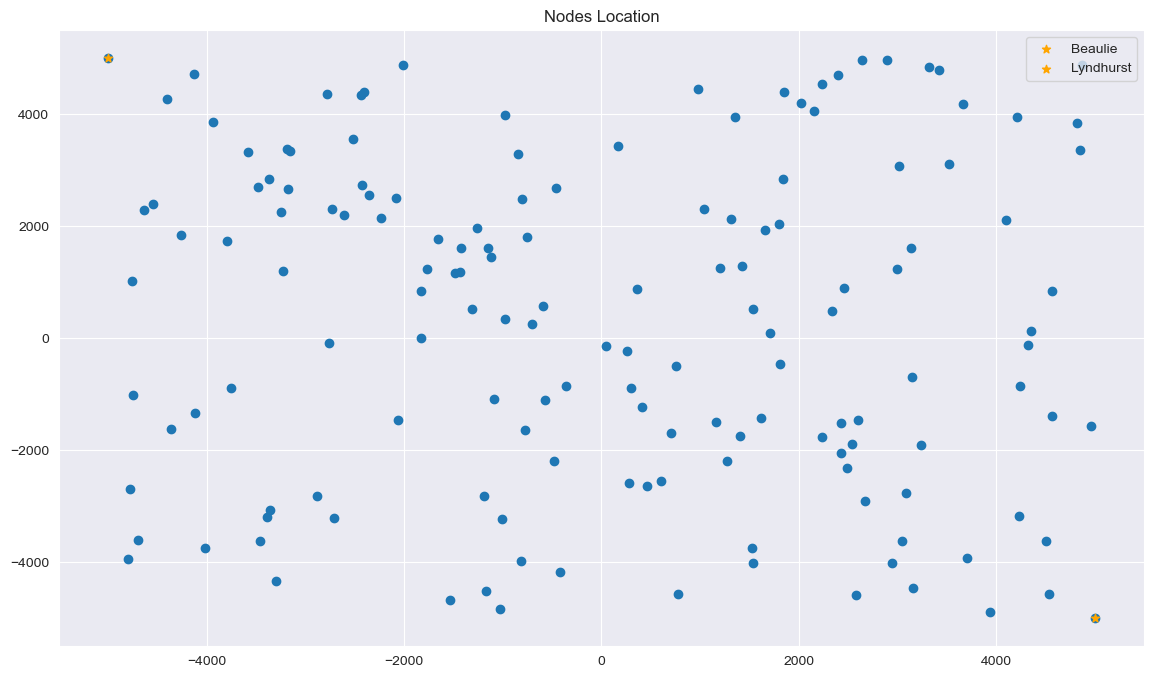

In [8]:
coordinate_x = position_data['Position1']
coordinate_y = position_data['Position2']

# Input Beaulieu and Lyndhurst coordinates
beaulie_coordinate = (5000, -5000)
lyndhurst_coordinate = (-5000, 5000)

plt.figure(figsize = (14, 8))
plt.title('Nodes Location')
plt.scatter(coordinate_x, coordinate_y)
plt.scatter(beaulie_coordinate[0], beaulie_coordinate[1], label='Beaulie', color='orange', marker='*')
plt.scatter(lyndhurst_coordinate[0], lyndhurst_coordinate[1], label='Lyndhurst', color='orange', marker='*')
plt.legend(loc='upper right')
plt.show()

> We are Going to create a function to get the particle to reach a destination vertex either 151, or 152.

In [9]:
def calculate_distance(x1, x2, y1, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
distances = [] # List for appending in dataframe
for i in range(len(position_data)):
    for j in range(i + 1, len(position_data)):
        id1 = position_data.index[i]
        id2 = position_data.index[j]
        x1, y1 = position_data.iloc[i]['Position1'], position_data.iloc[i]['Position2']
        x2, y2 = position_data.iloc[j]['Position1'], position_data.iloc[j]['Position2']
        distance = calculate_distance(x1, x2, y1, y2)
        distances.append({"point1": id1, "point2": id2, "distance": distance})

distance_df = pd.DataFrame(distances)
print(f'There are total of {len(distance_df)} points.')
distance_df.loc[(distance_df['point1'] == 1)& (distance_df['point2'] == 141)]

There are total of 11476 points.


,point1,point2,distance
139,1,141,7623.831483


In [10]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, float('inf')]
labels = [7,5,4,3,2,1,0]
distance_df['transmission'] = pd.cut(distance_df['distance'], bins=bins, labels=labels, right=False)
distance_df.drop(distance_df.index[distance_df['transmission'] == 0], inplace=True)
distance_df.head()

,point1,point2,distance,transmission
6,1,8,1034.795366,4
18,1,20,1552.523752,3
38,1,40,2232.795239,2
40,1,42,2475.977770,2
53,1,55,2932.511040,1


In [11]:
# Adding the graph data type for simplicity.
G = nx.Graph()
for _, row in distance_df.iterrows():
    G.add_edge(row['point1'], row['point2'], weight=row['transmission'])


In [12]:
print(f"Graph edges with weights: {list(G.edges(data=True))}")

Graph edges with weights: [(1.0, 8.0, {'weight': 4.0}), (1.0, 20.0, {'weight': 3.0}), (1.0, 40.0, {'weight': 2.0}), (1.0, 42.0, {'weight': 2.0}), (1.0, 55.0, {'weight': 1.0}), (1.0, 76.0, {'weight': 4.0}), (1.0, 86.0, {'weight': 1.0}), (1.0, 93.0, {'weight': 3.0}), (1.0, 94.0, {'weight': 2.0}), (1.0, 100.0, {'weight': 4.0}), (1.0, 114.0, {'weight': 4.0}), (1.0, 127.0, {'weight': 1.0}), (1.0, 133.0, {'weight': 1.0}), (1.0, 146.0, {'weight': 3.0}), (1.0, 150.0, {'weight': 1.0}), (8.0, 20.0, {'weight': 3.0}), (8.0, 40.0, {'weight': 2.0}), (8.0, 42.0, {'weight': 1.0}), (8.0, 55.0, {'weight': 1.0}), (8.0, 76.0, {'weight': 5.0}), (8.0, 86.0, {'weight': 1.0}), (8.0, 93.0, {'weight': 2.0}), (8.0, 94.0, {'weight': 4.0}), (8.0, 100.0, {'weight': 4.0}), (8.0, 114.0, {'weight': 3.0}), (8.0, 127.0, {'weight': 1.0}), (8.0, 133.0, {'weight': 3.0}), (8.0, 136.0, {'weight': 1.0}), (8.0, 146.0, {'weight': 7.0}), (8.0, 150.0, {'weight': 3.0}), (20.0, 6.0, {'weight': 2.0}), (20.0, 17.0, {'weight': 3.0}), 

> Some important functions to check path validity

In [13]:
# Function to check valid paths
# Should remove the ones with zero weights just to make sure the path is valid at all points.
# Don't think we will be using this function anymore because have already removed all zeros transmissions
def is_valid_path(path, graph):
    for i in range(len(path) - 1):
        if not graph.has_edge(path[i], path[i + 1]):
            return False
    return True

In [14]:
G.nodes()

NodeView((1.0, 8.0, 20.0, 40.0, 42.0, 55.0, 76.0, 86.0, 93.0, 94.0, 100.0, 114.0, 127.0, 133.0, 146.0, 150.0, 2.0, 4.0, 11.0, 12.0, 13.0, 38.0, 47.0, 48.0, 67.0, 71.0, 75.0, 82.0, 83.0, 88.0, 128.0, 132.0, 137.0, 147.0, 3.0, 9.0, 22.0, 23.0, 24.0, 26.0, 33.0, 39.0, 44.0, 50.0, 51.0, 54.0, 56.0, 68.0, 69.0, 70.0, 80.0, 99.0, 104.0, 108.0, 110.0, 111.0, 119.0, 122.0, 123.0, 125.0, 126.0, 141.0, 142.0, 144.0, 152.0, 27.0, 66.0, 73.0, 78.0, 105.0, 140.0, 143.0, 5.0, 16.0, 31.0, 32.0, 34.0, 60.0, 63.0, 65.0, 102.0, 109.0, 117.0, 121.0, 6.0, 10.0, 17.0, 21.0, 29.0, 35.0, 52.0, 59.0, 85.0, 87.0, 96.0, 101.0, 106.0, 115.0, 134.0, 135.0, 136.0, 148.0, 7.0, 18.0, 19.0, 25.0, 30.0, 45.0, 46.0, 58.0, 64.0, 79.0, 89.0, 91.0, 95.0, 98.0, 107.0, 113.0, 116.0, 130.0, 138.0, 139.0, 92.0, 129.0, 149.0, 124.0, 131.0, 14.0, 15.0, 28.0, 49.0, 53.0, 57.0, 61.0, 62.0, 72.0, 77.0, 81.0, 84.0, 90.0, 97.0, 112.0, 145.0, 151.0, 41.0, 43.0, 103.0, 118.0, 37.0, 74.0, 120.0, 36.0))

In [15]:
import random
NUM_PARTICLES=1
def initialize_population_from_df(start_node, distance_df, max_length=6):
    """
    Generate population using valid connections from distance_df.
    """
    population = []
    retries = 0
    valid_edges = list(zip(distance_df['point1'], distance_df['point2']))
    graph = nx.Graph(valid_edges)  # Create a graph from the valid connections

    while len(population) < NUM_PARTICLES and retries < 10000:
        retries += 1
        path = [start_node]
        current_node = start_node

        # Randomly select nodes to form a path
        for _ in range(random.randint(1, max_length - 2)):  # Middle part length
            neighbors = list(graph.neighbors(current_node))
            if not neighbors:
                break  # No valid neighbors, stop path construction
            next_node = random.choice(neighbors)
            if next_node not in path:  # Avoid cycles
                path.append(next_node)
                current_node = next_node

        # Append valid end node
        end_node = random.choice([151, 152])
        if graph.has_edge(current_node, end_node):
            path.append(end_node)
            population.append(path)
            retries = 0  # Reset retries on success

    # Fallback: Print warning if retries exceeded
    if len(population) < NUM_PARTICLES:
        print(f"Warning: Could only generate {len(population)} valid paths after 100 retries.")
    return population
population = initialize_population_from_df(1, distance_df, max_length=20)
print(population[0])
print(len(population))

[1, 127, 86, 133, 134, 139, 85, 87, 107, 56, 29, 141, 23, 70, 3, 152]
1


In [16]:
def initialize_population(start_node,graph,valid_end_nodes=[151,152], max_length=50):
    """
    This function initializes population in a rule of getting valid paths from
    valid end nodes. We didn't use max length so particles can take any length they want
    and keep on updating their path.
    :param start_node: node to start from example 2, 1, any
    :param graph: the graph object defined in the previous step (graph = nx.Graph(valid_edges))
    :param valid_end_nodes: these are nodes to end the path at. For assignment, it's 151 and 152.
    :param max_length: the maximum length of the path, we didn't use this parameter.'
    :return:
    """
    current_node = start_node # The starting point of our function.
    elems = [current_node] # This list holds the elements of the population
    # Basically here we loop until the last elem has valid end nodes. The neighbor are from the
    # graph. break condition included incase we don't find neighbors.
    while elems[-1] not in valid_end_nodes:
        neighbors = [neighbor for neighbor in graph.neighbors(current_node) if neighbor not in elems]
        if not neighbors:
            break
        next_node = random.choice(neighbors)
        elems.append(next_node)
        current_node = next_node
    return elems

In [21]:
populations = [initialize_population(1,G,valid_end_nodes=[151,152]) for _ in range(20)]

In [22]:
initialize_population(1, G)

[1,
 40.0,
 127.0,
 59.0,
 134.0,
 52.0,
 64.0,
 28.0,
 73.0,
 129.0,
 43.0,
 62.0,
 14.0,
 61.0,
 53.0,
 72.0,
 84.0,
 120.0,
 124.0,
 148.0,
 19.0,
 66.0,
 18.0,
 25.0,
 113.0,
 69.0,
 152.0]

In [23]:
def initialize_velocities(population, graph):
    """
    This  function initializes velocities for each particle in the population.
    In our case we have introduced our own research (We don't know if it exists) into the velocities. But the velocity is (direction to go , some weight and the place to update and start search from).
    :param population: population object defined in the previous step (population = [initialize_population(1,G,valid_end_nodes=[151,152]) for _ in range(20)])
    :param graph: graph object defined in the previous step (graph = nx.Graph(valid_edges))
    :return: (direction, weight_criteria, update_index)
    """
    velocities = []
    for individual in population:
       direction = individual[-1]
       weights = [
            graph[individual[i]][individual[i + 1]].get('weight', float('inf'))
            for i in range(len(individual) - 1)
        ]
       average_weight = np.mean(weights) if weights else float('inf')
       update_index = random.randint(1, len(individual) - 1)
       velocity = (direction, average_weight, update_index)
       velocities.append(velocity)
    return velocities

In [24]:
velocities = initialize_velocities(populations, G)
print(populations[0])
print(velocities[0])

[1, 86.0, 106.0, 16.0, 63.0, 26.0, 70.0, 23.0, 123.0, 126.0, 119.0, 110.0, 96.0, 42.0, 93.0, 21.0, 114.0, 150.0, 100.0, 133.0, 87.0, 122.0, 111.0, 117.0, 130.0, 79.0, 30.0, 24.0, 33.0, 148.0, 58.0, 113.0, 34.0, 39.0, 144.0, 91.0, 31.0, 89.0, 12.0, 78.0, 145.0, 27.0, 25.0, 102.0, 50.0, 29.0, 52.0, 55.0, 6.0, 68.0, 9.0, 56.0, 22.0, 65.0, 64.0, 28.0, 116.0, 35.0, 124.0, 105.0, 15.0, 97.0, 62.0, 84.0, 103.0, 41.0, 92.0, 112.0, 115.0, 129.0, 46.0, 18.0, 88.0, 67.0, 38.0, 73.0, 14.0, 90.0, 53.0, 151.0]
(151.0, 2.6582278481012658, 62)


In [25]:
def update_velocity(position, velocity, global_best_position,
                    personal_best_position, personal_best_fitness,
                    global_best_fitness,current_fitness,
                    inertia=0.7,c1=1.5, c2=1.5 ):
    """
    TODO: Use global best fitness to see how it can influence the movement of particle.
    This function chooses either to take the global best or personal best path.
    The position is the same as the personal best position.
    The returned values are update index (Very important),
    direction and Some Weight(This value is computed as the minimum weight that will
    be used in finding neighbours) (Very important)
    I haven't used the global best fitness in the update but it works well.


    Parameters:
        position (list): Current position of the particle.
        velocity (tuple): (direction, weight_criteria, update_index).
        global_best_position (list): Global best path.

    Returns:
        tuple: Updated velocity (direction, weight_criteria, update_index).
    """
    direction, weight_criteria, update_index = velocity


    direction = global_best_position[-1]
    momentum = inertia * weight_criteria

    # Influence from personal best.
    if personal_best_fitness < current_fitness:
        start_index = max(0, len(personal_best_position) - update_index)
        personal_indices = range(start_index, len(personal_best_position))
        cognitive_difference = [personal_best_position[i] - position[i] for i in personal_indices]
        cognitive_influence = c1 * np.random.random() * np.mean(cognitive_difference)
    else:
        cognitive_influence = 0.0

    # Influence from the global best.
    if np.random.random() < 0.5:
        random_index = np.random.randint(0, len(global_best_position))
        social_difference = global_best_position[random_index] - position[random_index]
        social_influence = c2 * np.random.random() * social_difference
    else:
        social_influence = 0.0

    # The weight to choose from based on the influence.
    new_weight_criteria = momentum + cognitive_influence + social_influence

    # Check if it should use personal best or global best.
    if cognitive_influence > social_influence:
        direction = personal_best_position[-1]
        new_update_index = np.random.randint(max(0, len(personal_best_position) - update_index), len(personal_best_position))
    else:
        direction = global_best_position[-1]
        new_update_index = np.random.randint(2, len(global_best_position))

    return direction, new_weight_criteria, new_update_index

    # Update weight criteria slightly towards global convergence
    # global_weight = np.mean([global_best_position[i] for i in range(len(global_best_position))])
    # current_weight = np.mean(position)
    #
    # new_weight_criteria = weight_criteria + np.random.random() * (global_weight - current_weight)
    #
    # new_update_index = min(len(position) - 1, len(global_best_position) - 1)
    #
    # # Random chance to explore slightly around the global best index
    # if np.random.random() < 0.5:
    #     new_update_index = np.random.randint(1, len(global_best_position) - 1)
    #
    # cognitive_influence = 0.5
    # social_influence = 0.5
    #
    #
    # return direction, new_weight_criteria, new_update_index

In [26]:
def update_position(position, velocity, graph):
    """
    Updates the position based on velocity and graph structure.
    Important thing here is neighbors. How to choose the direction.
    As a bad choice can lead to very long paths and poor performance.
    Also, we multiplied weight criteria by 0.9 / any scaler to get it to choose better number (to reduce search of weight criteria by small number.)
    This should be updated in the future.

    Parameters:
        position (list): Current position (path) of the particle.
        velocity (tuple): (direction, min_weight, update_index).
        graph (networkx.Graph): The graph with weighted edges.

    Returns:
        list: Updated position (path).
    """
    direction, min_weight, update_index = velocity
    start_node = position[:update_index]  # Partial path up to the update index
    current_node = start_node[-1]
    elems = start_node.copy()

    while elems[-1] != direction:  # Stop when reaching the desired direction
        neighbors = [neighbor for neighbor in graph.neighbors(current_node) if neighbor not in elems]

        # Prefer neighbors leading toward the target direction
        if direction in neighbors:
            elems.append(direction)
            return elems

        if not neighbors:
            # If no neighbors, return the initial position
            return position

        # Choose neighbors with valid weights
        weighted_neighbors = [
            (neighbor, graph[current_node][neighbor].get('weight', float('inf'))) for neighbor in neighbors
        ]
        valid_neighbors = [neighbor for neighbor, weight in weighted_neighbors if weight >= min_weight]

        if not valid_neighbors:
            # If no valid neighbors, reduce weight criteria slightly to explore
            min_weight *= 0.9
            valid_neighbors = [neighbor for neighbor, weight in weighted_neighbors if weight >= min_weight]

            if not valid_neighbors:
                return position  # Return to initial position if no valid moves

        # Choose a random valid neighbor
        next_node = random.choice(valid_neighbors)
        elems.append(next_node)
        current_node = next_node

    return elems

In [45]:
# Just checking random path generated to see if everything works fine.
update_position([1, 86.0, 150.0, 17.0, 21.0, 59.0, 10.0, 98.0, 64.0, 112.0, 27.0, 137.0, 128.0, 88.0, 4.0, 105.0, 129.0, 116.0, 115.0, 95.0, 26.0, 125.0, 111.0, 104.0, 142.0, 63.0, 60.0, 152.0], (152.0, 3.037037037037037, 13), G)

[1,
 86.0,
 150.0,
 17.0,
 21.0,
 59.0,
 10.0,
 98.0,
 64.0,
 112.0,
 27.0,
 137.0,
 128.0,
 88.0,
 4.0,
 105.0,
 129.0,
 116.0,
 115.0,
 95.0,
 26.0,
 125.0,
 111.0,
 104.0,
 142.0,
 63.0,
 60.0,
 152.0]

## We have come up with this fitness function where we can minimize the cost function of transmission rate and latency to obtain optimal particles.

$$
\text{fitness} = w_{\text{rate}} \cdot (1 - \text{norm rate}) + w_{\text{latency}} \cdot \text{norm latency}
$$

In [28]:
def fitness_function(path, graph, w_latency=1.0, w_rate=1.0):
    """
    Fitness function that combines latency and transmission rate.

    Parameters:
        path (list): The particle's current path.
        graph (networkx.Graph): The graph structure with weighted edges.
        w_latency (float): Weight for latency.
        w_rate (float): Weight for transmission rate.

    Returns:
        float: Fitness of the path (lower is better).
    """
    total_latency = 30 * (len(path) - 1)  # Fixed latency cost per each graph path.
    min_transmission_rate = float("inf")

    for i in range(len(path) - 1):
        u, v = path[i], path[i + 1]
        if graph.has_edge(u, v):
            edge_data = graph[u][v]
            min_transmission_rate = min(min_transmission_rate, edge_data["weight"])
        else:
            return float("inf")  # Invalid Paths have inf.

    # Normalize and combine the metrics
    norm_latency = total_latency / len(graph.nodes())
    norm_rate = min_transmission_rate / max([data["weight"] for _, _, data in graph.edges(data=True)])

    return w_rate * (1 - norm_rate) + w_latency * norm_latency


In [29]:
fitness_function(populations[0], G)

16.44924812030075

In [30]:
fitnesses = [fitness_function(path, G) for path in populations]

In [31]:
min(fitnesses), max(fitnesses)

(2.6334586466165417, 27.896616541353385)

In [65]:
NUM_PARTICLES = 1000

def pso(graph, start_node, df, max_length=20, iterations=10):
    """
    PSO implementation for pathfinding in a graph using valid paths.
    """
    # Step 1: Initialize Population
    population = [initialize_population(start_node, graph=graph, valid_end_nodes=[151, 152]) for _ in range(NUM_PARTICLES)]
    velocities = initialize_velocities(population, graph=graph)
    #print(f'Initial Population: {population}')

    # Calculate Initial Fitness
    fitnesses = [fitness_function(path, graph) for path in population]
    personal_best_positions = population.copy()
    personal_best_fitnesses = fitnesses.copy()

    # Identify Initial Global Best
    global_best_index = np.argmin(personal_best_fitnesses)
    global_best_position = personal_best_positions[global_best_index]
    global_best_fitness = personal_best_fitnesses[global_best_index]

    final_global_best_fitnesses = []

    # Step 2: Main PSO Loop
    for iteration in range(iterations):
        for i in range(NUM_PARTICLES):
            current_fitness = fitness_function(population[i], graph)
            # Update velocity
            velocities[i] = update_velocity(
                position=population[i],
                velocity=velocities[i],
                global_best_position=global_best_position,
                global_best_fitness=global_best_fitness,
                personal_best_position=personal_best_positions[i],
                personal_best_fitness=personal_best_fitnesses[i],
                current_fitness=current_fitness,
            )

            # Update position based on new velocity
            new_position = update_position(population[i], velocities[i], graph)
            # if population[i] == new_position:
            #     print(f'Particle {i} did not move. Skipping iteration.')
            # else:
            #     print(f'Particle {i} moved to {new_position}')

            # Evaluate fitness of the new position
            new_fitness = fitness_function(new_position, graph)

            # Update personal best if the new fitness is better
            if new_fitness < personal_best_fitnesses[i]:
                personal_best_fitnesses[i] = new_fitness
                personal_best_positions[i] = new_position
                if new_fitness < global_best_fitness:
                    global_best_fitness = new_fitness
                    global_best_position = new_position
                population[i] = new_position
                # print(f'Particle {i} updated personal best to {new_position} with fitness {new_fitness}')
            else:
                population[i] = population[i]


        # Log progress every 10 iterations
        if iteration % 100 == 0 or iteration == iterations - 1:
            print(f"Iteration {iteration}: Global Best Fitness = {global_best_fitness}")
            print(f"Global Best Position: {global_best_position}")

        final_global_best_fitnesses.append(global_best_fitness)

    # Step 3: Output Final Solution
    print(f'Final Population: {population}')
    print("\nFinal Results:")
    print(f"Best Path Found: {global_best_position}")
    print(f"Best Fitness: {global_best_fitness}")

In [66]:
pso(graph=G,start_node=5, df=distance_df, max_length=20, iterations=200)

Iteration 0: Global Best Fitness = 1.1090225563909775
Global Best Position: [5, 108.0, 152.0]
Iteration 100: Global Best Fitness = 1.1090225563909775
Global Best Position: [5, 108.0, 152.0]
Iteration 199: Global Best Fitness = 1.1090225563909775
Global Best Position: [5, 108.0, 152.0]
Final Population: [[5, 60.0, 152.0], [5, 111.0, 152.0], [5, 34.0, 142.0, 152.0], [5, 109.0, 32.0, 111.0, 152.0], [5, 108.0, 152.0], [5, 108.0, 152.0], [5, 56.0, 152.0], [5, 39.0, 69.0, 152.0], [5, 16.0, 33.0, 56.0, 152.0], [5, 22.0, 122.0, 141.0, 80.0, 125.0, 152.0], [5, 80.0, 108.0, 152.0], [5, 117.0, 125.0, 152.0], [5, 108.0, 152.0], [5, 39.0, 111.0, 152.0], [5, 109.0, 121.0, 51.0, 152.0], [5, 51.0, 152.0], [5, 80.0, 108.0, 152.0], [5, 34.0, 22.0, 119.0, 69.0, 152.0], [5, 44.0, 152.0], [5, 44.0, 152.0], [5, 39.0, 104.0, 152.0], [5, 31.0, 32.0, 60.0, 152.0], [5, 102.0, 119.0, 142.0, 152.0], [5, 60.0, 152.0], [5, 65.0, 108.0, 152.0], [5, 31.0, 18.0, 58.0, 113.0, 148.0, 22.0, 63.0, 141.0, 65.0, 79.0, 33.0,

In [71]:
"""
TODO:
1. Finish Parreto front function.
2. Calculate the rate and latency of each path.
3. Find the Pareto-optimal solutions.
4. Print the results.
"""
solutions = [

]


# Simulate Objective Calculation Function
# For each path, compute objectives like latency, rate, or hops
def calculate_objectives(path):
    """Calculate metrics (latency, rate, hops) for a given path."""
    latency = 30 * (len(path) - 1)  # Latency is the number of hops (edges)

    for i in range(len(path) - 1):
        # Get the weight of the edge (path[i] -> path[i+1])
        edge_weight = G.get((path[i], path[i + 1]), None)
        if edge_weight is None:
            raise ValueError(f"Edge ({path[i]}, {path[i + 1]}) not found in the weights dictionary")

        # Rate is the minimum of the maximum weights
        rate = min(rate, edge_weight)
    hops = len(path)  # Total hops (number of nodes in the path)
    return latency, rate, hops


# Prepare objectives for all solutions
objectives = [calculate_objectives(path) for path in solutions]


# Pareto Front Functions
def is_dominated(solution, other_solution):
    """Check if one solution is dominated by another."""
    return all(x <= y for x, y in zip(solution, other_solution)) and any(
        x < y for x, y in zip(solution, other_solution)
    )


def pareto_front(objectives):
    """Filter solutions to find Pareto-optimal set."""
    pareto_solutions = []
    for i, sol1 in enumerate(objectives):
        if not any(is_dominated(sol1, sol2) for j, sol2 in enumerate(objectives) if i != j):
            pareto_solutions.append(sol1)
    return pareto_solutions


# Compute Pareto front from objectives
pareto_optimal = pareto_front(objectives)

# Print Results
print("Pareto-Optimal Solutions:")
for sol in pareto_optimal:
    print(f"Latency: {sol[0]}, Rate: {sol[1]}, Hops: {sol[2]}, Solution: {solutions[objectives.index(sol)]}")


Pareto-Optimal Solutions:


In [67]:
#12 -> 143 -> 25 -> 46 -> 19 -> 116 -> 124 -> 112 -> 28 -> 61 -> 145 -> 15 -> 53 -> 57 -> 151, Maximum Transmission Rate: 151, Latency: 420 ms
fitness_function([5, 108.0, 152.0], G)

1.1090225563909775

In [36]:
def plot_points(df, nodes):
    coordinate_x = df['Position1']
    coordinate_y = df['Position2']

    # Compute the positions of the nodes passed
    path_list = [tuple(position_data.loc[i, ['Position1', 'Position2']].tolist()) for i in nodes]
    plt.figure(figsize = (12, 8))
    plt.title('Nodes Location')
    plt.scatter(coordinate_x, coordinate_y)
    for j in range(len(path_list) -1):
        plt.plot([path_list[j][0], path_list[j + 1][0]], [path_list[j][1], path_list[j + 1][1]], 'r-', label="Line Path" if j == 0 else "")
    plt.legend(loc='upper right')
    plt.show()

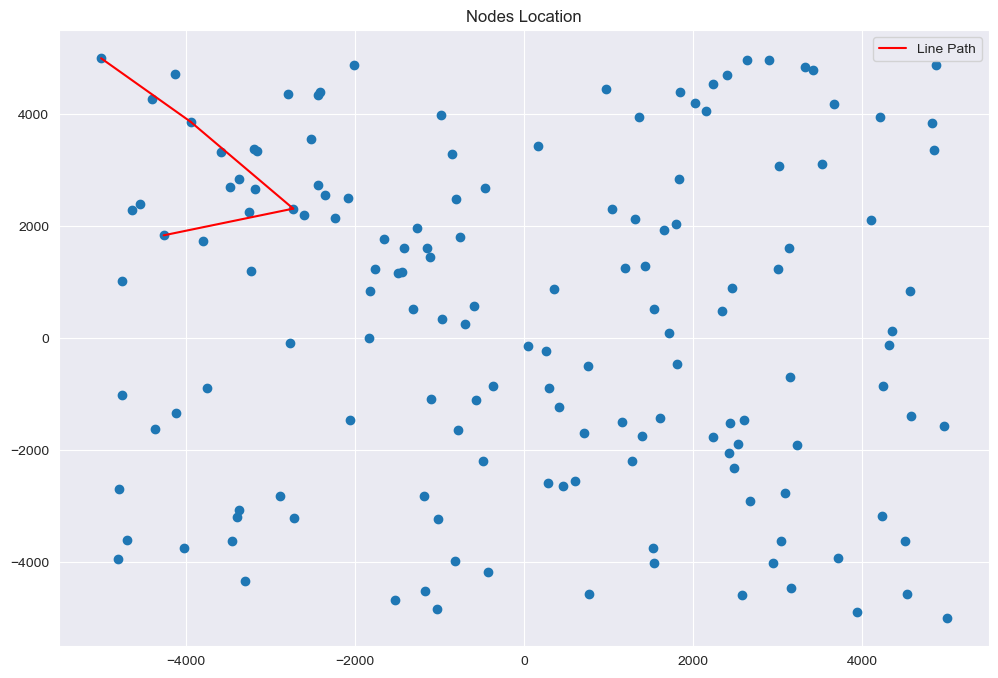

In [70]:
plot_points(position_data, [5, 144.0, 44.0, 152.0])